In [1]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
df1 = pd.read_csv('C:/Users/HP/Documents/Well PR/welldatatrainSHMAX_XX.csv')
df2 = pd.read_csv('C:/Users/HP/Documents/Well PR/welldatatrainSHMAX_Y.csv')

In [5]:
df1.describe()

,BMK_STAT Norm,HRA_norm,YME_Norm,RHOB_Norm,SMG Norm,PR_DYN,TNPH
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,0.435336,0.244689,0.631520,0.259990,0.402161,0.256835,0.030456
std,0.044559,0.102193,0.056975,0.008255,0.039096,0.023556,0.023268
min,0.197730,0.000000,0.313471,0.174460,0.191197,0.156378,0.006600
25%,0.412572,0.200000,0.615771,0.258260,0.390357,0.242309,0.016200
50%,0.436558,0.200000,0.639009,0.260210,0.406914,0.255178,0.021900
75%,0.460679,0.300000,0.659622,0.261890,0.423181,0.270588,0.035300
max,0.607010,0.500000,0.839937,0.287200,0.532654,0.346385,0.197900


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

In [4]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
        fig.tight_layout() # Improves appearance a bit.
    plt.show()
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()
def plot_correlation_map( df ):
    corr = df1.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _= sns.heatmap(
    corr,
    cmap = cmap,
    square=True,
    cbar_kws={ 'shrink' : .9 },
    ax=ax,
    annot = True,
    annot_kws = { 'fontsize' : 12 }
    )
def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels
def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame(
    model.feature_importances_ ,
    columns = [ 'Importance' ] ,
    index = X.columns
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

In [68]:
df2.head

<bound method NDFrame.head of       Shmax_norm
0       0.509101
1       0.513514
2       0.521931
3       0.522483
4       0.525030
...          ...
1040    0.555273
1041    0.575751
1042    0.576168
1043    0.581397
1044    0.598482

[1045 rows x 1 columns]>

In [62]:
Y_train = (df2.iloc[:,0].values.astype('float32'))
X_train = (df1.iloc[:,0].values.astype('float32'))

In [58]:
Y_train

array([0.5091006 , 0.513514  , 0.5219307 , ..., 0.57616806, 0.5813971 ,
       0.59848166], dtype=float32)

In [5]:
df = df1.append(df2, sort=False)

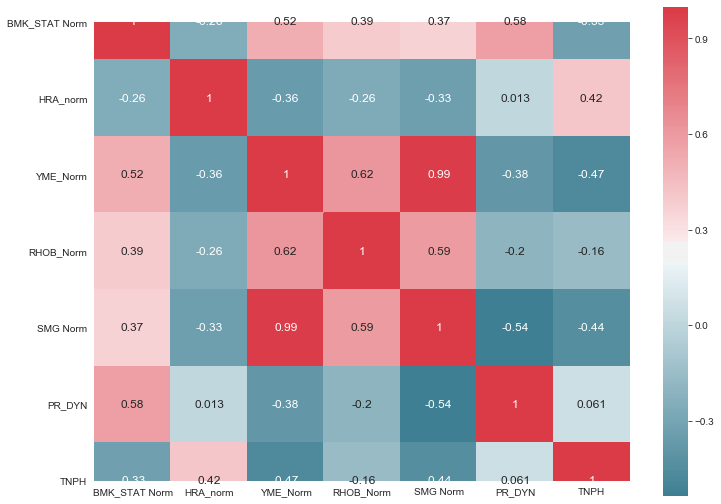

In [6]:
plot_correlation_map(df)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.40, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=1)

In [10]:
y_train

,Shmax_norm
824,0.569700
106,0.509843
39,0.508072
222,0.510661
483,0.516669
...,...
622,0.552756
330,0.549298
409,0.523111
883,0.531556


Train on 564 samples, validate on 63 samples
Epoch 1/7
564/564 [==============================] - 1s 2ms/step - loss: 0.2296 - mean_squared_error: 0.2296 - val_loss: 0.2323 - val_mean_squared_error: 0.2323
Epoch 2/7
564/564 [==============================] - 0s 207us/step - loss: 0.2295 - mean_squared_error: 0.2295 - val_loss: 0.2323 - val_mean_squared_error: 0.2323
Epoch 3/7
564/564 [==============================] - 0s 225us/step - loss: 0.2295 - mean_squared_error: 0.2295 - val_loss: 0.2322 - val_mean_squared_error: 0.2322
Epoch 4/7
564/564 [==============================] - 0s 195us/step - loss: 0.2295 - mean_squared_error: 0.2295 - val_loss: 0.2322 - val_mean_squared_error: 0.2322
Epoch 5/7
564/564 [==============================] - 0s 149us/step - loss: 0.2294 - mean_squared_error: 0.2294 - val_loss: 0.2322 - val_mean_squared_error: 0.2322
Epoch 6/7
564/564 [==============================] - 0s 268us/step - loss: 0.2294 - mean_squared_error: 0.2294 - val_loss: 0.2321 - val_mean_s

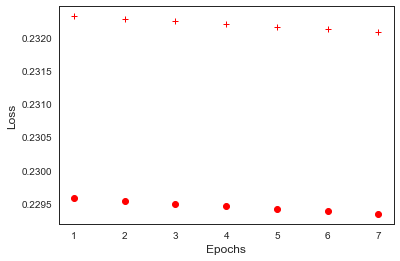

In [36]:
model = Sequential()
model.add(Dense(64, activation = 'sigmoid', input_shape=(7,)))
#model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation ='relu'))

from keras.optimizers import RMSprop
model.compile(optimizer=Adam(lr=0.00000001),
             loss= 'mse',
             metrics=['mean_squared_error'])
#model.compile(optimizer='Adam', loss='mse', metrics=['mean_squared_error'])

history = model.fit(X_train, y_train, epochs = 7, validation_data =(X_val, y_val))

history_dict = history.history

print(model.summary())

_loss = history_dict['loss']*100
print(_loss)
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.figure()
plt.plot(loss_values,'b', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')


import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'ro')
plt.plot(epochs, val_loss_values, 'r+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [87]:
#ytt = column_or_1d(y_train. warn=True)
from sklearn.neighbors import KNeighborsClassifier
sgd = KNeighborsClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_val)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

C:\Users\HP\Anaconda3\envs\tf\Lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


ValueError: Unknown label type: 'continuous'

In [95]:
X_test.shape

(418, 7)

In [1]:
df1 = pd.read_csv('C:/Users/HP/Documents/Well PR/welldatatrainSHMAX_XX.csv')
df2 = pd.read_csv('C:/Users/HP/Documents/Well PR/welldatatrainSHMAX_Y.csv')

NameError: name 'pd' is not defined

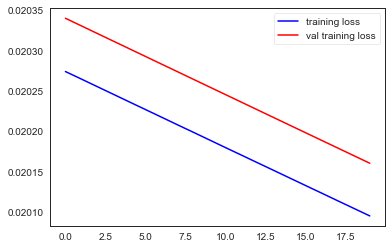

In [18]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.plot(loss_values,'b', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')
plt.legend()
plt.show()

In [25]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the train set is:	-1.304
The R2 score on the test set is:	-1.166


In [96]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("The R2 score on the train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the train set is:	-28.326
The R2 score on the test set is:	-30.258


In [136]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [20]:
model.evaluate(X_test, y_test_pred, verbose=0)

[0.0, 0.0]

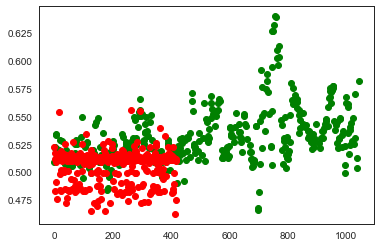

In [26]:

plt.clf()
#plt.plot(y_train,'go', y_train_pred, 'bo', label='Predicted SHmax')
plt.plot(y_test, 'go', y_test_pred, 'ro', label='val training loss')

In [118]:
#y_test.head
y_test_pred

array([[0.54368335],
       [0.5465245 ],
       [0.55148953],
       [0.54560775],
       [0.54468113],
       [0.54609996],
       [0.5457943 ],
       [0.5549622 ],
       [0.5459986 ],
       [0.545758  ],
       [0.55904824],
       [0.5468752 ],
       [0.5462969 ],
       [0.54552203],
       [0.55427027],
       [0.5458342 ],
       [0.5465933 ],
       [0.5459956 ],
       [0.55370945],
       [0.5473221 ],
       [0.5518171 ],
       [0.54607767],
       [0.5430388 ],
       [0.551472  ],
       [0.5499649 ],
       [0.5451043 ],
       [0.54573107],
       [0.5457216 ],
       [0.54759103],
       [0.54580545],
       [0.54931575],
       [0.5471735 ],
       [0.550154  ],
       [0.5463459 ],
       [0.54912204],
       [0.5458766 ],
       [0.5521752 ],
       [0.5452568 ],
       [0.5464188 ],
       [0.54647446],
       [0.5461809 ],
       [0.5558366 ],
       [0.54464304],
       [0.5551583 ],
       [0.54719543],
       [0.54495996],
       [0.55171025],
       [0.548

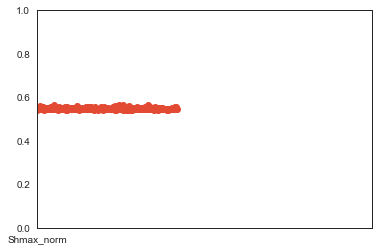

In [117]:
import matplotlib.pyplot as plt
data = [(y_test),(y_test_pred)]
labels, y = data

x = range(len(y))
plt.plot(x, y, 'o')
plt.xticks(x, labels)
plt.axis([0,1000,0,1.0])
plt.show()

In [25]:
y_test_pred.shape

(345, 1)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train_pred)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test_pred)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

YellowbrickTypeError: This estimator is not a regressor; try a classifier or clustering score visualizer instead!

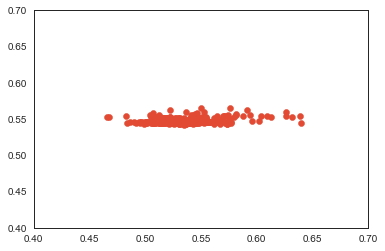

In [116]:
plt.scatter(y_test, y_test_pred, marker='o')
plt.xlim(0.4,0.7)
plt.ylim(0.4,0.7)
plt.show()

In [37]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [32]:
from pandas import DataFrame
df12 = DataFrame(y_test_pred)


In [114]:
export_csv=df12.to_csv(r'C:\Users\HP\Documents\Well PR\result12.csv',index=None, header=True)

In [118]:
df22=DataFrame(y_test)
export_csv=df22.to_csv(r'C:\Users\HP\Documents\Well PR\result22.csv',index=None, header=True)

In [33]:
print(df12)

            0
0    0.544135
1    0.532718
2    0.538906
3    0.515668
4    0.517048
..        ...
340  0.512331
341  0.531537
342  0.517324
343  0.520129
344  0.505876

[345 rows x 1 columns]


In [35]:
print(y_test)

     Shmax_norm
949    0.561793
94     0.549750
135    0.516194
614    0.526726
354    0.506751
..          ...
33     0.510374
809    0.551021
386    0.513296
57     0.509341
528    0.527025

[345 rows x 1 columns]


In [37]:
pip install git+https://github.com/sat28/githubcommit.git
jupyter serverextension enable --py githubcommit
jupyter nbextension install --py githubcommit

SyntaxError: invalid syntax (<ipython-input-37-d004dd126760>, line 1)